### Convert a table of zip codes and median income into a dataframe

In [1]:
import requests
import urllib.request
import numpy as np
import pandas as pd
url = 'http://zipatlas.com/us/ny/new-york/zip-code-comparison/median-household-income.htm'

In [2]:
df = pd.read_html(
    url, 
    attrs={'rules': 'all'}, 
    header=0, 
    index_col="#")[0]

df

,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
#,,,,,,
1.0,10007,"40.713973, -74.008336","New York, New York",3522,"$112,947.00",#132
2.0,10280,"40.708501, -74.016828","New York, New York",6614,"$108,536.00",#157
3.0,10162,"40.769298, -73.949942","New York, New York",1726,"$108,416.00",#158
4.0,10004,"40.691870, -74.014109","New York, New York",1225,"$101,868.00",#238
5.0,10069,"40.775551, -73.989689","New York, New York",1403,"$88,091.00",#507
...,...,...,...,...,...,...
60.0,10169,"40.754391, -73.976098","New York, New York",0,$0.00,"#32,019"
61.0,10170,"40.752625, -73.975877","New York, New York",1,$0.00,"#32,020"
62.0,10171,"40.755899, -73.973858","New York, New York",1,$0.00,"#32,021"


### Remove uneeded columns and clean data

In [3]:
df.dtypes

Zip Code               int64
Location              object
City                  object
Population             int64
Avg. Income/H/hold    object
National Rank         object
dtype: object

In [4]:
df.drop(['City', 'Population', 'National Rank'], axis = 1, inplace=True)
df

,Zip Code,Location,Avg. Income/H/hold
#,,,
1.0,10007,"40.713973, -74.008336","$112,947.00"
2.0,10280,"40.708501, -74.016828","$108,536.00"
3.0,10162,"40.769298, -73.949942","$108,416.00"
4.0,10004,"40.691870, -74.014109","$101,868.00"
5.0,10069,"40.775551, -73.989689","$88,091.00"
...,...,...,...
60.0,10169,"40.754391, -73.976098",$0.00
61.0,10170,"40.752625, -73.975877",$0.00
62.0,10171,"40.755899, -73.973858",$0.00


In [5]:
df['Avg. Income/H/hold'] = df[['Avg. Income/H/hold']].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',',''))
df['Avg. Income/H/hold'] = pd.to_numeric(df['Avg. Income/H/hold'])
df = df[df['Avg. Income/H/hold'] > 0]
df.head()

,Zip Code,Location,Avg. Income/H/hold
#,,,
1.0,10007,"40.713973, -74.008336",112947.0
2.0,10280,"40.708501, -74.016828",108536.0
3.0,10162,"40.769298, -73.949942",108416.0
4.0,10004,"40.691870, -74.014109",101868.0
5.0,10069,"40.775551, -73.989689",88091.0


In [6]:
df['Latitude'] = 1.0
df['Longitude']= 1.0

C:\Users\p1gsl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\p1gsl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
for x in np.arange(1,44):
    df['Latitude'][x] = df.loc[x, 'Location'].split(', ')[0]
    df['Longitude'][x] = df.loc[x, 'Location'].split(', ')[1]


C:\Users\p1gsl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\p1gsl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\p1gsl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipyker

In [8]:
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.drop(['Location'], axis = 1, inplace = True)
df.head()

C:\Users\p1gsl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\p1gsl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\p1gsl\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,Zip Code,Avg. Income/H/hold,Latitude,Longitude
#,,,,
1.0,10007,112947.0,40.713973,-74.008336
2.0,10280,108536.0,40.708501,-74.016828
3.0,10162,108416.0,40.769298,-73.949942
4.0,10004,101868.0,40.691870,-74.014109
5.0,10069,88091.0,40.775551,-73.989689


In [9]:
df.rename(columns = {'Avg. Income/H/hold' : 'Income'}, inplace=True)

C:\Users\p1gsl\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Map the zipcodes and incomes

In [10]:
import json
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

In [85]:
map_newyork = folium.Map(location=[40.7127281, -74.0060152], zoom_start=11)

# add markers to map
for lat, lng, code, income in zip(df['Latitude'], df['Longitude'], df['Zip Code'], df['Income']):
    label = '{}, {}'.format(code, income)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## Use Foursquare's API to gather venues within 1500 meter radius of zip code

In [12]:
CLIENT_ID = 'xxx'
CLIENT_SECRET = 'yyy' 
VERSION = '20180605' 
LIMIT = 200

In [13]:
def getNearbyVenues(code, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for code, lat, lng in zip(code, latitudes, longitudes):
        print(code)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            code, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip Code', 
                  'Latitude', 
                  'Longitude', 
                  'Venue',
                  'Venue ID',                              
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
ny_venues = getNearbyVenues(code=df['Zip Code'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

10007
10280
10162
10004
10069
10282
10006
10022
10005
10024
10028
10021
10023
10128
10017
10014
10016
10010
10011
10003
10012
10019
10044
10025
10018
10036
10001
10009
10013
10033
10038
10034
10040
10037
10032
10031
10002
10027
10026
10029
10030
10039
10035


In [17]:
#Figure out what types of venues there are
venues = ny_venues.groupby('Venue Category').count()
venues.index.values

array(['Adult Boutique', 'African Restaurant', 'American Restaurant',
       'Amphitheater', 'Antique Shop', 'Arcade', 'Arepa Restaurant',
       'Argentinian Restaurant', 'Art Gallery', 'Art Museum',
       'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports',
       'Auditorium', 'Australian Restaurant', 'Austrian Restaurant',
       'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bank', 'Bar',
       'Baseball Field', 'Baseball Stadium', 'Basketball Court',
       'Basketball Stadium', 'Beach', 'Beer Bar', 'Beer Garden',
       'Beer Store', 'Big Box Store', 'Bike Rental / Bike Share',
       'Bike Shop', 'Bike Trail', 'Bistro', 'Boat or Ferry', 'Bookstore',
       'Boutique', 'Boxing Gym', 'Breakfast Spot', 'Brewery', 'Bridge',
       'Bubble Tea Shop', 'Building', 'Burger Joint', 'Burrito Place',
       'Butcher', 'Cafeteria', 'Café', 'Cambodian Restaurant',
       'Camera Store', 'Campground', 'Candy Store',
       'Caribbean Restaurant', 'Castle', 'Cheese Shop',
       'Chinese

In [18]:
#Foursquare has two categories for gyms, gather a complete list of both
gymlist = ['Gym', 'Gym / Fitness Center']
gyms = ny_venues[ny_venues['Venue Category'].isin(gymlist)]
gyms

,Zip Code,Latitude,Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
2,10007,40.713973,-74.008336,The Class by Taryn Toomey,58a253c830ecc66c9e5b40a0,40.712753,-74.008734,Gym / Fitness Center
7,10007,40.713973,-74.008336,Equinox Tribeca,4a6e331af964a52031d41fe3,40.714099,-74.009686,Gym
43,10007,40.713973,-74.008336,Equinox Brookfield Place,541a2341498e51ce1037963a,40.712704,-74.014995,Gym
49,10007,40.713973,-74.008336,Y7 Studio - Tribeca,5a817f4859c4231a14ba3998,40.717831,-74.006204,Gym / Fitness Center
59,10007,40.713973,-74.008336,Crunch - FiDi,5a697271ad178907f79be157,40.708614,-74.010013,Gym / Fitness Center
...,...,...,...,...,...,...,...,...
3978,10029,40.792245,-73.945230,92nd Street Y May Center,4c9a873ad4b1b1f79dffd035,40.783108,-73.952758,Gym / Fitness Center
3990,10029,40.792245,-73.945230,ChaiseFitness,52b9c263498ebbff8b240197,40.783065,-73.952648,Gym
4018,10030,40.818492,-73.943283,Harlem YMCA,4a6b5879f964a52082ce1fe3,40.814790,-73.942910,Gym / Fitness Center
4069,10030,40.818492,-73.943283,Blink Fitness,51b35586498e4fcfa012f235,40.810539,-73.951460,Gym


In [19]:
#Find venue IDs for the unique gyms in the list
Ugyms = gyms.groupby('Venue ID').count()
Ugyms

,Zip Code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Venue ID,,,,,,,
42af6f80f964a5205a251fe3,3,3,3,3,3,3,3
45938647f964a52045401fe3,2,2,2,2,2,2,2
46b78e2cf964a520bc491fe3,2,2,2,2,2,2,2
49c9439bf964a5204e581fe3,2,2,2,2,2,2,2
49c943d2f964a5204f581fe3,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
5a6ca12395d986525fa14684,2,2,2,2,2,2,2
5a817f4859c4231a14ba3998,2,2,2,2,2,2,2
5b60d31767a9fe002c34b374,2,2,2,2,2,2,2


### Get Ratings and Likes for each Gym

In [20]:
def getRatings(ID):    
      
    ratings_list=[]
    for x in ID:
        print(x)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            x,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,)
            
        # make the GET request
        results1 = requests.get(url).json()
        ratings_list.append([
            x,
            results1["response"]["venue"]['rating'],
            results1["response"]["venue"]['likes']['count']])
     
    gym_ratings = pd.DataFrame(ratings_list, columns = ['Venue ID', 'Rating', 'Likes'])
#    gym_ratings.columns = ['Venue ID', 'Rating', 'Likes']
    return(gym_ratings)

In [21]:
gymratings = getRatings(Ugyms.index.values)

42af6f80f964a5205a251fe3
45938647f964a52045401fe3
46b78e2cf964a520bc491fe3
49c9439bf964a5204e581fe3
49c943d2f964a5204f581fe3
49fa353af964a520da6d1fe3
49fce426f964a520ed6e1fe3
4a2f3322f964a520b6981fe3
4a66f31af964a520dcc81fe3
4a68fb35f964a52064cb1fe3
4a6b5879f964a52082ce1fe3
4a6e331af964a52031d41fe3
4a6f77a1f964a5203ed61fe3
4a705a19f964a5204ed71fe3
4a72e5fef964a52050db1fe3
4a7ca51ff964a52012ed1fe3
4a97e23df964a520db2920e3
4ac13d5ff964a5205b9620e3
4ad51226f964a520aa0121e3
4ad854bbf964a5200b1121e3
4adf1930f964a5208a7721e3
4b5b2086f964a52008e528e3
4b9d849ff964a52087b136e3
4bd46a0a4e32d13ab905bf80
4c8f52811664b1f7ea3da72f
4c9a873ad4b1b1f79dffd035
4d042ad28620224ba18ca740
4d2873d277a2a1cdec6262b7
4e2f5a1ae4cdb5a70d6807b8
4e319ffd81302aa582e25114
4e4e91ca18505e3814e804c6
4eb5c125f9f40c39c596bb4a
4efe614e0e618ea7655927b8
4f9e99f7e4b06064311cf82e
4ff23228e4b099c410f77195
5158e6bde4b079b32ba7e7fd
51b35586498e4fcfa012f235
51dc98c6498e0a421438a27b
521b898a8bbdce5bf8e95c58
521c185b11d26fe322a0b139


In [32]:
gymratings

,Venue ID,Rating,Likes
0,42af6f80f964a5205a251fe3,9.2,259
1,45938647f964a52045401fe3,8.8,181
2,46b78e2cf964a520bc491fe3,8.7,108
3,49c9439bf964a5204e581fe3,8.9,637
4,49c943d2f964a5204f581fe3,8.4,364
...,...,...,...
72,5a6ca12395d986525fa14684,8.5,18
73,5a817f4859c4231a14ba3998,8.4,20
74,5b60d31767a9fe002c34b374,8.7,14
75,5bccb80067f62b002c693885,7.9,7


In [37]:
#Add ratings to gym dataframe
gyms = gyms.merge(gymratings, on="Venue ID")

In [42]:
#Find Max gym rating per zip code
zipmaxrating = gyms.groupby("Zip Code").max()
zipmaxrating.drop(['Latitude', 'Longitude', 'Venue', 'Venue ID','Venue Latitude', 'Venue Longitude', 'Venue Category', 'Likes'], axis = 1, inplace = True)
zipmaxrating.rename(columns = {'Rating' : 'MaxRating'}, inplace=True)


,MaxRating
Zip Code,
10001,9.3
10002,8.8
10003,9.3
10004,8.1
10005,9.1
10006,9.1
10007,9.1
10010,9.3
10011,9.3


In [47]:
#Find average rating per zip code
zipavgrating = gyms.groupby("Zip Code").mean()
zipavgrating.drop(['Latitude', 'Longitude', 'Venue Latitude', 'Venue Longitude', 'Likes'], axis = 1, inplace = True)
zipavgrating.rename(columns = {'Rating' : 'AvgRating'}, inplace=True)


,AvgRating
Zip Code,
10001,8.875000
10002,8.800000
10003,9.150000
10004,8.100000
10005,8.900000
10006,8.880000
10007,8.800000
10010,9.114286
10011,8.966667


In [48]:
#Find sum of likes for gyms in each zip code
zipsumlikes = gyms.groupby("Zip Code").sum()
zipsumlikes.drop(['Latitude', 'Longitude', 'Venue Latitude', 'Venue Longitude', 'Rating'], axis = 1, inplace = True)
zipsumlikes.rename(columns = {'Likes' : 'SumLikes'}, inplace=True)
zipsumlikes

,SumLikes
Zip Code,
10001,257
10002,42
10003,564
10004,80
10005,524
10006,774
10007,794
10010,753
10011,1538


## Create final dataframe with income, max rating, average rating, and likes of gyms per zip code

In [57]:
finalratings = pd.concat([zipmaxrating, zipavgrating, zipsumlikes], axis=1)

In [60]:
finaldf = df.merge(finalratings, on='Zip Code')
finaldf.drop(['Latitude', 'Longitude'], axis = 1, inplace = True)
finaldf.set_index('Zip Code', inplace = True)
finaldf

,Income,MaxRating,AvgRating,SumLikes
Zip Code,,,,
10007,112947.0,9.1,8.800000,794
10280,108536.0,9.1,8.880000,774
10162,108416.0,8.5,8.500000,262
10004,101868.0,8.1,8.100000,80
10069,88091.0,9.0,8.775000,1169
10282,86066.0,9.1,8.825000,463
10006,81334.0,9.1,8.880000,774
10022,80406.0,9.5,9.100000,997
10005,79517.0,9.1,8.900000,524


## Plot result of Foursquare data vs Income

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

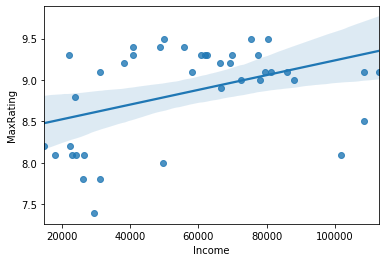

In [70]:
sns.regplot(x="Income", y="MaxRating", data=finaldf)

In [80]:
lm = LinearRegression()
x = finaldf[['Income']]
lm.fit(x,finaldf['MaxRating'])
lm.score(x,finaldf['MaxRating'])

0.17804472122880555

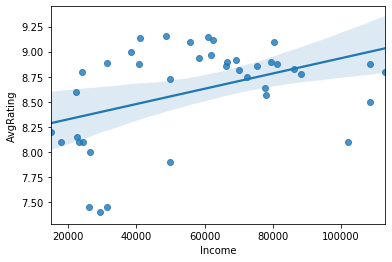

In [71]:
sns.regplot(x="Income", y="AvgRating", data=finaldf)

In [81]:
lm.fit(x,finaldf['AvgRating'])
lm.score(x,finaldf['AvgRating'])

0.18525880999275657

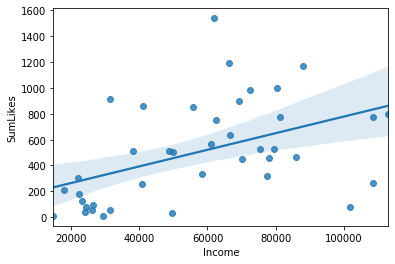

In [72]:
sns.regplot(x="Income", y="SumLikes", data=finaldf)

In [82]:
lm.fit(x,finaldf['SumLikes'])
lm.score(x,finaldf['SumLikes'])

0.21452802023256545

In [73]:
finaldf.corr()['Income'].sort_values()

MaxRating    0.421953
AvgRating    0.430417
SumLikes     0.463172
Income       1.000000
Name: Income, dtype: float64

### Normalize the data

In [63]:
from sklearn import preprocessing

x = finaldf.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
finaldfnorm = pd.DataFrame(x_scaled, columns = finaldf.columns)
finaldfnorm.set_index(finaldf.index.values, inplace = True)
finaldfnorm

,Income,MaxRating,AvgRating,SumLikes
10007,1.000000,0.809524,0.795455,0.513089
10280,0.955013,0.809524,0.840909,0.500000
10162,0.953789,0.523810,0.625000,0.164921
10004,0.887008,0.333333,0.397727,0.045812
10069,0.746499,0.761905,0.781250,0.758508
10282,0.725847,0.809524,0.809659,0.296466
10006,0.677586,0.809524,0.840909,0.500000
10022,0.668122,1.000000,0.965909,0.645942
10005,0.659055,0.809524,0.852273,0.336387
10024,0.644257,0.761905,0.662879,0.294503


### Create a metric called GymScore to determine desirableness of building a gym in each zip code

In [64]:
finaldfnorm['GymScore'] = finaldfnorm['Income'] * 5 - finaldfnorm['MaxRating'] * 2 - finaldfnorm['AvgRating'] - finaldfnorm['SumLikes'] * 2


,Income,MaxRating,AvgRating,SumLikes,GymScore
10007,1.000000,0.809524,0.795455,0.513089,1.559320
10280,0.955013,0.809524,0.840909,0.500000,1.315109
10162,0.953789,0.523810,0.625000,0.164921,2.766485
10004,0.887008,0.333333,0.397727,0.045812,3.279022
10069,0.746499,0.761905,0.781250,0.758508,-0.089579
10282,0.725847,0.809524,0.809659,0.296466,0.607595
10006,0.677586,0.809524,0.840909,0.500000,-0.072026
10022,0.668122,1.000000,0.965909,0.645942,-0.917185
10005,0.659055,0.809524,0.852273,0.336387,0.151180
10024,0.644257,0.761905,0.662879,0.294503,0.445589


In [66]:
#Sort by GymScore to find most and least desirable zip codes
finaldfnorm.sort_values(by = 'GymScore', ascending=False, inplace = True)
finaldfnorm

,Income,MaxRating,AvgRating,SumLikes,GymScore
10004,0.887008,0.333333,0.397727,0.045812,3.279022
10162,0.953789,0.523810,0.625000,0.164921,2.766485
10007,1.000000,0.809524,0.795455,0.513089,1.559320
10280,0.955013,0.809524,0.840909,0.500000,1.315109
10025,0.355295,0.285714,0.284091,0.014398,0.892158
10034,0.148729,0.000000,0.000000,0.000000,0.743644
10282,0.725847,0.809524,0.809659,0.296466,0.607595
10024,0.644257,0.761905,0.662879,0.294503,0.445589
10033,0.167790,0.190476,0.028409,0.029450,0.370689
10028,0.639147,0.904762,0.704545,0.200262,0.281142
